<a href="https://colab.research.google.com/github/erjank/mupt-analysis/blob/main/MSD_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Please navigate to block (4) and (5) to see the Final code with comments.
#### Let's gradually walk through the problems and code!

#### Part - 1

#### import the files
#### 1) .dump (contains trajectories)
#### 2) .txt (containes timesteps)

In [6]:
# Get dependencies that aren't included in colab, plus example files for analysis
!pip install MDAnalysis
!wget https://raw.githubusercontent.com/MuPT-hub/mupt-analysis/refs/heads/main/production_1ns.dump
!wget https://raw.githubusercontent.com/MuPT-hub/mupt-analysis/refs/heads/main/python.txt

--2025-06-11 18:06:11--  https://raw.githubusercontent.com/MuPT-hub/mupt-analysis/refs/heads/main/python.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115 [text/plain]
Saving to: ‘python.txt’

python.txt          100%[===================>]     115  --.-KB/s    in 0s      

2025-06-11 18:06:11 (6.06 MB/s) - ‘python.txt’ saved [115/115]



In [7]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis.analysis.msd as msd
u = mda.Universe("production_1ns.dump", format="LAMMPSDUMP")
python_times = np.loadtxt('python.txt')
#


/usr/local/lib/python3.11/dist-packages/MDAnalysis/topology/LAMMPSParser.py:651: UserWarning: Guessed all Masses to 1.0
  warnings.warn("Guessed all Masses to 1.0")
/usr/local/lib/python3.11/dist-packages/MDAnalysis/coordinates/LAMMPS.py:751: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data["time"] = step_num * ts.dt


#### I will the values of the .txt file multiple (between linearly and non-linear/exponentially increased ts) before each block of code and run the codes to compare...

#### 1) Calculate MSD. No time averaging only average over all the particles! timesteps are the usual exponential trend we follow i.e., 2^0 to 2^20

Frame 0: MSD = 0.0
Frame 1: MSD = 7.567644206574187e-05
Frame 2: MSD = 0.0006711921305395663
Frame 3: MSD = 0.0034164325334131718
Frame 4: MSD = 0.012431675568223
Frame 5: MSD = 9.529627799987793
Frame 6: MSD = 15.158470153808594
Frame 7: MSD = 23.198976516723633
Frame 8: MSD = 30.702102661132812
Frame 9: MSD = 39.68592834472656
Frame 10: MSD = 51.815765380859375
Frame 11: MSD = 64.29840087890625
Frame 12: MSD = 79.07508087158203
Frame 13: MSD = 95.05611419677734
Frame 14: MSD = 115.84335327148438
Frame 15: MSD = 138.80897521972656
Frame 16: MSD = 165.20802307128906
Frame 17: MSD = 198.88772583007812
Frame 18: MSD = 232.73460388183594
Frame 19: MSD = 268.996826171875
Frame 20: MSD = 335.84283447265625


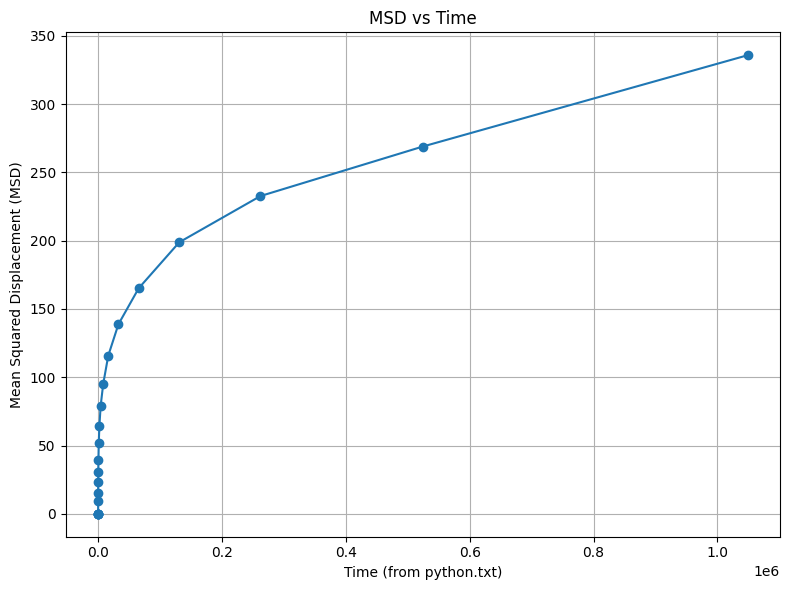

In [8]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis.analysis.msd as msd
u = mda.Universe("production_1ns.dump", format="LAMMPSDUMP")
python_times = np.loadtxt('python.txt')
# Select all atoms
all_atoms = u.select_atoms("all")
n_atoms = len(all_atoms)
n_frames = len(u.trajectory)
# Store initial positions (frame 0)
u.trajectory[0]
initial_positions = all_atoms.positions.copy()

# Prepare array to store MSD per frame
msd_per_frame = np.zeros(n_frames)

# Loop over frames
for i, ts in enumerate(u.trajectory):
    current_positions = all_atoms.positions
    displacements = current_positions - initial_positions
    squared_displacements = np.sum(displacements**2, axis=1)  # sum over x, y, z
    msd = np.mean(squared_displacements)  # average over all atoms
    msd_per_frame[i] = msd
    print(f"Frame {i}: MSD = {msd}")

# Plot
plt.figure(figsize=(8, 6))
plt.plot(python_times, msd_per_frame, marker='o', linestyle='-')
plt.xlabel('Time (from python.txt)')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('MSD vs Time')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2) Now with Time averaging. Changing the .txt as linearly dumped 1 2 3 4 ..... 21

Δt 1: MSD = 77.84795168948702
Δt 2: MSD = 91.28136499721225
Δt 3: MSD = 100.16714904784327
Δt 4: MSD = 108.50426102164515
Δt 5: MSD = 115.95459365517337
Δt 6: MSD = 123.2225137586285
Δt 7: MSD = 131.66137450674026
Δt 8: MSD = 140.01342542785522
Δt 9: MSD = 148.9154453683269
Δt 10: MSD = 158.9512833983638
Δt 11: MSD = 169.51377544593112
Δt 12: MSD = 181.2876291731876
Δt 13: MSD = 194.06853782920817
Δt 14: MSD = 208.1029101366353
Δt 15: MSD = 223.4742138746855
Δt 16: MSD = 240.34210457992407
Δt 17: MSD = 259.1198865030255
Δt 18: MSD = 279.193535757145
Δt 19: MSD = 302.4206399988626
Δt 20: MSD = 335.84280119424255


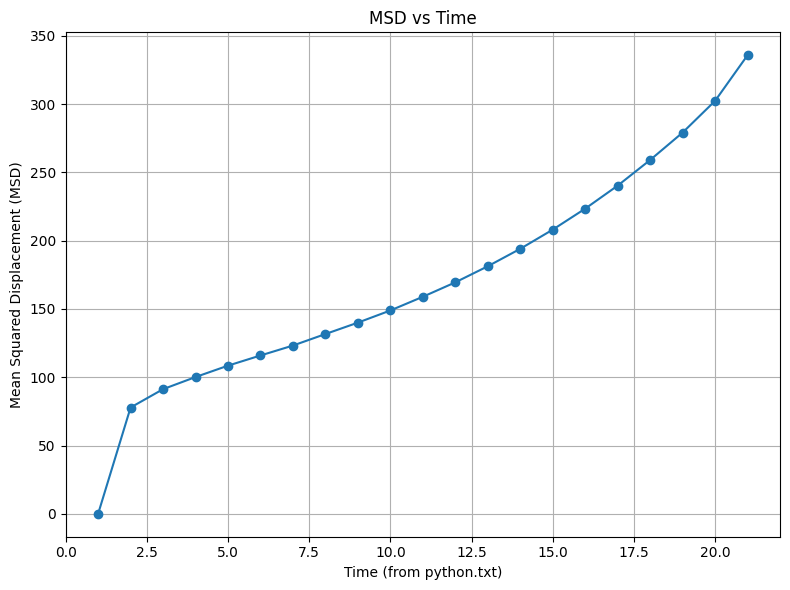

In [ ]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis.analysis.msd as msd
u = mda.Universe("production_1ns.dump", format="LAMMPSDUMP")
python_times = np.loadtxt('python_linear.txt')
import numpy as np

# Select all atoms
all_atoms = u.select_atoms("all")
n_atoms = len(all_atoms)
n_frames = len(u.trajectory)

# Preload all positions into a (n_frames, n_atoms, 3) array
positions = np.zeros((n_frames, n_atoms, 3))
for frame_idx, ts in enumerate(u.trajectory):
    positions[frame_idx] = all_atoms.positions

# Prepare array to store MSD vs. time lag (Δt)
max_dt = n_frames - 1  # max possible lag
msd_vs_dt = np.zeros(max_dt)

# Loop over time lags Δt = 1 to max_dt
for dt in range(1, max_dt + 1):
    msd_sum = 0.0
    count = 0

    # Loop over all valid start frames
    for start in range(n_frames - dt):
        pos_start = positions[start]
        pos_end = positions[start + dt]

        # Calculate displacement for all atoms
        disp = pos_end - pos_start  # shape (n_atoms, 3)
        squared_disp = np.sum(disp ** 2, axis=1)  # shape (n_atoms,)

        # Average over atoms
        msd_frame = np.mean(squared_disp)
        msd_sum += msd_frame
        count += 1

    # Average over all start points
    msd_vs_dt[dt - 1] = msd_sum / count
    print(f"Δt {dt}: MSD = {msd_vs_dt[dt - 1]}")

def shift_array_right_with_zero(arr):
    shifted = np.zeros(len(arr) + 1, dtype=arr.dtype)
    shifted[1:] = arr
    return shifted
# print(shift_array_right_with_zero(msd_vs_dt))
msd_vs_dt = shift_array_right_with_zero(msd_vs_dt)

plt.figure(figsize=(8, 6))
plt.plot(python_times, msd_vs_dt, marker='o', linestyle='-')
plt.xlabel('Time (from python.txt)')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('MSD vs Time')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 3) MDA claims to do the time averaging too so let's check! (linearly dumped 1 2 3 4 ..... 21)

100%|██████████| 60000/60000 [00:05<00:00, 10561.15it/s]

[-1.07568970e-11  7.78479517e+01  9.12813650e+01  1.00167149e+02
  1.08504261e+02  1.15954594e+02  1.23222514e+02  1.31661375e+02
  1.40013425e+02  1.48915445e+02  1.58951283e+02  1.69513775e+02
  1.81287629e+02  1.94068538e+02  2.08102910e+02  2.23474214e+02
  2.40342105e+02  2.59119887e+02  2.79193536e+02  3.02420640e+02
  3.35842801e+02]


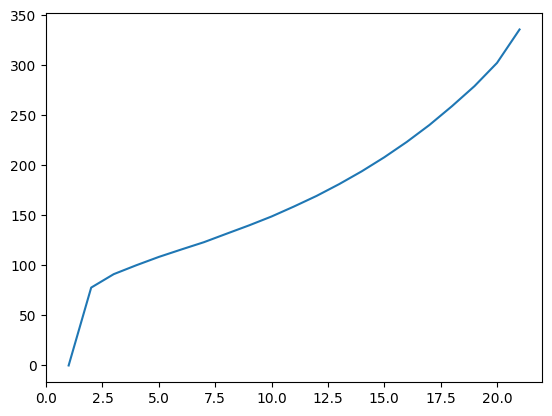

In [ ]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis.analysis.msd as msd
u = mda.Universe("production_1ns.dump", format="LAMMPSDUMP")
python_times = np.loadtxt('python_linear.txt')

u = mda.Universe("production_1ns.dump", format="LAMMPSDUMP")

MSD = msd.EinsteinMSD(u, select='all', msd_type='xyz', fft=True)
MSD.run()

msd_MDA =  MSD.results.timeseries

print(msd_MDA)

fig = plt.figure()
ax = plt.axes()

ax.plot(python_times, msd_MDA, ls="-", label=r'3D random walk')

#### Okay so the last two are Matched! By doing so far we have reached two conclusions:
#### i. If there is a linear dump msd package from MDA can be used and we have figured the behind the scenes code with the formula.
#### ii. If the system is non-linear we can skip the time averaging part and take the first frame as reference and assign an MSD value to all the other frames.

#### 3.2) Let's again use the msd package from MDA. This time let's just update the python.txt and compare the plots with the first block of code (non-time averaging). Updating the .txt to 2^0 to 2^20

100%|██████████| 60000/60000 [00:05<00:00, 10696.47it/s]

[-1.07568970e-11  7.78479517e+01  9.12813650e+01  1.00167149e+02
  1.08504261e+02  1.15954594e+02  1.23222514e+02  1.31661375e+02
  1.40013425e+02  1.48915445e+02  1.58951283e+02  1.69513775e+02
  1.81287629e+02  1.94068538e+02  2.08102910e+02  2.23474214e+02
  2.40342105e+02  2.59119887e+02  2.79193536e+02  3.02420640e+02
  3.35842801e+02]


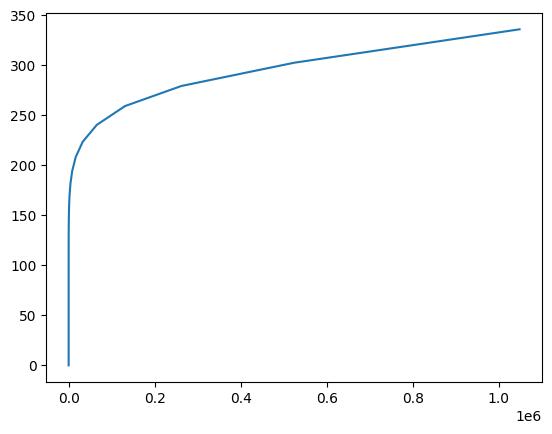

In [ ]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis.analysis.msd as msd
u = mda.Universe("production_1ns.dump", format="LAMMPSDUMP")
python_times = np.loadtxt('python.txt')

u = mda.Universe("production_1ns.dump", format="LAMMPSDUMP")

MSD = msd.EinsteinMSD(u, select='all', msd_type='xyz', fft=True)
MSD.run()

msd_MDA =  MSD.results.timeseries

print(msd_MDA)

fig = plt.figure()
ax = plt.axes()

ax.plot(python_times, msd_MDA, ls="-", label=r'3D random walk')

#### So, we can clearly see that from block 3.2 msd in MDA doesn't work for non-linear timesteps. Basically, it is considering every file to be linear dumped and doing the time averaging. The solution so far is to not do the time averaging for a non-linear dumped file.  

#### This is good but we can do better!
#### For a non-linearly dumped file there can be two more delta_t (difference in their absolute timesteps) between any two pairs of frames without repetation. We can average the MSD values of such frame pairs with same delta_t!

#### Part - 2

#### 4) The approach is the same as block (2) that go to each frame calculate the msds from each frame and update dictionary with key (delta_t) : value (msd). For pairs with same delta_t  average the msd and for unique delta_t just append in the dictionary. Show and plot the key (x axis) vs value (y axis)

defaultdict(<class 'list'>, {1.0: [7.567643921399091e-05], 3.0: [0.0006711921641563701], 7.0: [0.0034164327871623753], 15.0: [0.012431675144152965], 31.0: [9.529627627822155], 63.0: [15.158470625154514], 127.0: [23.198975843973113], 255.0: [30.702104041633415], 511.0: [39.685930721940814], 1023.0: [51.81576843253431], 2047.0: [64.29840190573968], 4095.0: [79.07508475484535], 8191.0: [95.0561195452338], 16383.0: [115.84334776265332], 32767.0: [138.8089833987945], 65535.0: [165.20803198843214], 131071.0: [198.8877409309397], 262143.0: [232.73461269452594], 524287.0: [268.9968443646768], 1048575.0: [335.84280119424255], 2.0: [0.0003010483342465401], 6.0: [0.0025656259044513716], 14.0: [0.011181908940227003], 30.0: [9.529808290536062], 62.0: [15.158977168059968], 126.0: [23.199660636605618], 254.0: [30.70256620998786], 510.0: [39.68684729387202], 1022.0: [51.816659110028965], 2046.0: [64.29958717407878], 4094.0: [79.07646287403166], 8190.0: [95.05691656152716], 16382.0: [115.8444636769963]

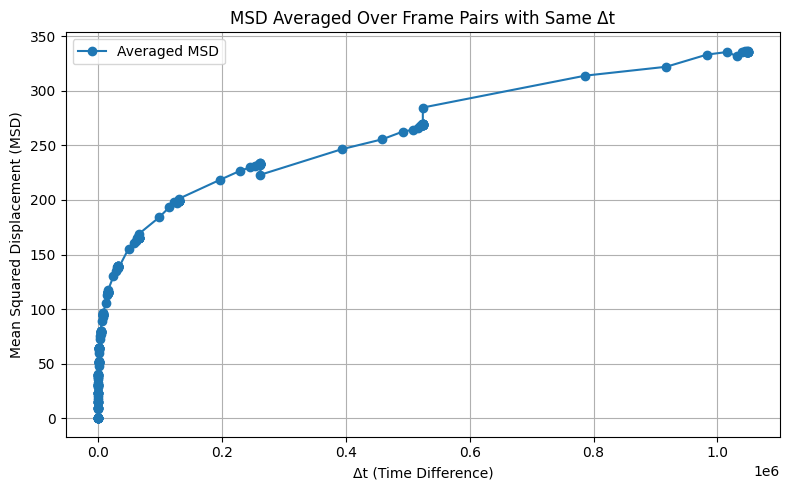

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis.analysis.msd as msd
u = mda.Universe("production_1ns.dump", format="LAMMPSDUMP")
python_times = np.loadtxt('python.txt')

# Load universe
u = mda.Universe("production_1ns.dump", format="LAMMPSDUMP")

# Load actual times (shape: n_frames,)
times = np.loadtxt('python.txt')
n_frames = len(times)

# Select all atoms
all_atoms = u.select_atoms("all")
n_atoms = len(all_atoms)

# Preload positions (shape: n_frames, n_atoms, 3)
positions = np.zeros((n_frames, n_atoms, 3))
for frame_idx, ts in enumerate(u.trajectory):
    positions[frame_idx] = all_atoms.positions

# Dictionary to collect MSDs: {Δt: [msd1, msd2, ...]}
msd_dict = defaultdict(list)

# Loop over all frame pairs (i < j)
for i in range(n_frames):
    for j in range(i + 1, n_frames):
        delta_t = times[j] - times[i]

        # Compute displacement and squared displacement
        disp = positions[j] - positions[i]  # shape (n_atoms, 3)
        squared_disp = np.sum(disp ** 2, axis=1)  # shape (n_atoms,)
        msd = np.mean(squared_disp)  # average over atoms

        # Store MSD under corresponding Δt
        msd_dict[delta_t].append(msd)

print(msd_dict)
msd_dict[0] = [0]
# Prepare averaged results
delta_t_values = []
avg_msds = []

for delta_t in sorted(msd_dict.keys()):
    msd_list = msd_dict[delta_t]
    avg_msd = np.mean(msd_list)
    delta_t_values.append(delta_t)
    avg_msds.append(avg_msd)
    print(f"Δt = {delta_t}: Averaged MSD = {avg_msd} (from {len(msd_list)} pairs)")

# Plot Δt vs averaged MSD
plt.figure(figsize=(8, 5))
plt.plot(delta_t_values, avg_msds, marker='o', linestyle='-', label='Averaged MSD')

plt.xlabel('Δt (Time Difference)')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('MSD Averaged Over Frame Pairs with Same Δt')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### 5) Block (4) code Should work for linearly dumped file as well! Let's switch our the .txt to the linear one and run the same code as of block (4)

defaultdict(<class 'list'>, {1.0: [7.567643921399091e-05, 0.0003010483342465401, 0.0011812128882260973, 0.004357233602991862, 9.543333733783664, 8.909475600211127, 18.009000566625506, 22.78526855092501, 32.19839134443004, 40.56439970987032, 52.38606454981948, 63.26712361055931, 80.34696654483196, 95.6749269293592, 117.8430379304564, 137.51225615773905, 168.80832178652344, 201.32125908729543, 223.122891181001, 284.66040133504475], 2.0: [0.0006711921641563701, 0.0025656259044513716, 0.008751948518137457, 9.533641002612157, 15.17734442516213, 20.476540385422243, 28.63409883782932, 36.05976862016476, 48.14008039976995, 59.65104685553488, 73.00128102145455, 89.59385945588288, 105.98158715820061, 129.93721799327494, 155.38746564708995, 183.97142189827989, 218.4323255825468, 246.4805273301529, 313.8757395670679], 3.0: [0.0034164327871623753, 0.011181908940227003, 9.530578573399412, 15.164856714781138, 23.216520613257945, 29.73568260537573, 37.44200568194917, 50.52932277882123, 62.410026812569

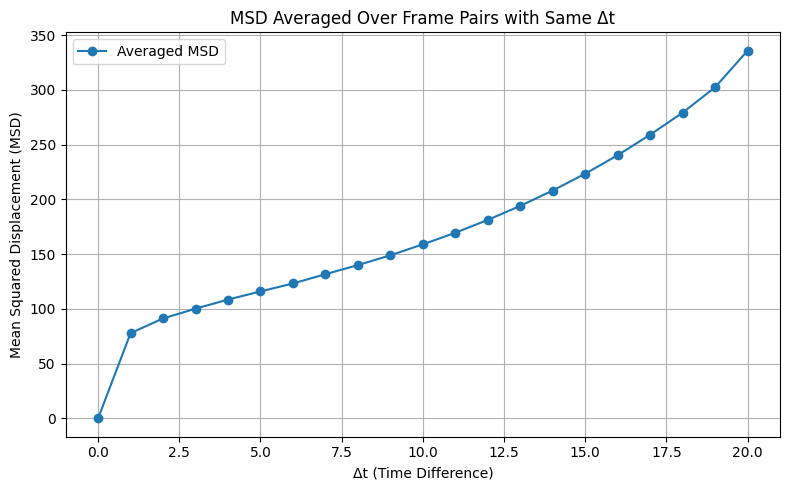

In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


# Load universe
u = mda.Universe("production_1ns.dump", format="LAMMPSDUMP")

# Load actual times (shape: n_frames,)
times = np.loadtxt('python_linear.txt')
n_frames = len(times)

# Select all atoms
all_atoms = u.select_atoms("all")
n_atoms = len(all_atoms)

# Preload positions (shape: n_frames, n_atoms, 3)
positions = np.zeros((n_frames, n_atoms, 3))
for frame_idx, ts in enumerate(u.trajectory):
    positions[frame_idx] = all_atoms.positions

# Dictionary to collect MSDs: {Δt: [msd1, msd2, ...]}
msd_dict = defaultdict(list)

# Loop over all frame pairs (i < j)
for i in range(n_frames):
    for j in range(i + 1, n_frames):
        delta_t = times[j] - times[i]

        # Compute displacement and squared displacement
        disp = positions[j] - positions[i]  # shape (n_atoms, 3)
        squared_disp = np.sum(disp ** 2, axis=1)  # shape (n_atoms,)
        msd = np.mean(squared_disp)  # average over atoms

        # Store MSD under corresponding Δt
        msd_dict[delta_t].append(msd)

print(msd_dict)
msd_dict[0] = [0]
# Prepare averaged results
delta_t_values = []
avg_msds = []

for delta_t in sorted(msd_dict.keys()):
    msd_list = msd_dict[delta_t]
    avg_msd = np.mean(msd_list)
    delta_t_values.append(delta_t)
    avg_msds.append(avg_msd)
    print(f"Δt = {delta_t}: Averaged MSD = {avg_msd} (from {len(msd_list)} pairs)")

# Plot Δt vs averaged MSD
plt.figure(figsize=(8, 5))
plt.plot(delta_t_values, avg_msds, marker='o', linestyle='-', label='Averaged MSD')

plt.xlabel('Δt (Time Difference)')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('MSD Averaged Over Frame Pairs with Same Δt')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### The output of Block (5) is exactly same as Block (2) and (3)

#### Thus we conclude, Block 4 or 5 is the most generalized version of the code that calculate time averaged MSD and can be used in any dump format wheather it is linear and non-linear!